In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import pandas_profiling as pp
!pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report ,f1_score,precision_score,recall_score,roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 13.8 MB/s eta 0:00:00


In [2]:
# loading data
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
data.head() 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#columns of the data
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
#shape of the data
data.shape

(5110, 12)

In [5]:
# take a shallow copy from my data 
df=data.copy()


In [6]:
fig=px.pie(df,values=df["stroke"].value_counts(),
           names=["آNo Stroke","stroke"],title="<b>Percentage of People Having Strokes",
           hole=.5,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=35)
fig.show()

In [7]:
#description of percent of data object columns
col=df.select_dtypes(include=['object']).columns.tolist()
#create iteration of object columns
for i in col[:]:
    count=df.groupby(['stroke'])[i].value_counts()[1]
    percent=df.groupby(['stroke'])[i].value_counts(normalize=True)[1]
    display(pd.DataFrame({"Patients":count, "Percent":percent*100})\
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))\
            .format({"Percent": "{:,.1f}%"}))
           


,Patients,Percent
gender,,
Female,141,56.6%
Male,108,43.4%


,Patients,Percent
ever_married,,
Yes,220,88.4%
No,29,11.6%


,Patients,Percent
work_type,,
Private,149,59.8%
Self-employed,65,26.1%
Govt_job,33,13.3%
children,2,0.8%


,Patients,Percent
Residence_type,,
Urban,135,54.2%
Rural,114,45.8%


,Patients,Percent
smoking_status,,
never smoked,90,36.1%
formerly smoked,70,28.1%
Unknown,47,18.9%
smokes,42,16.9%


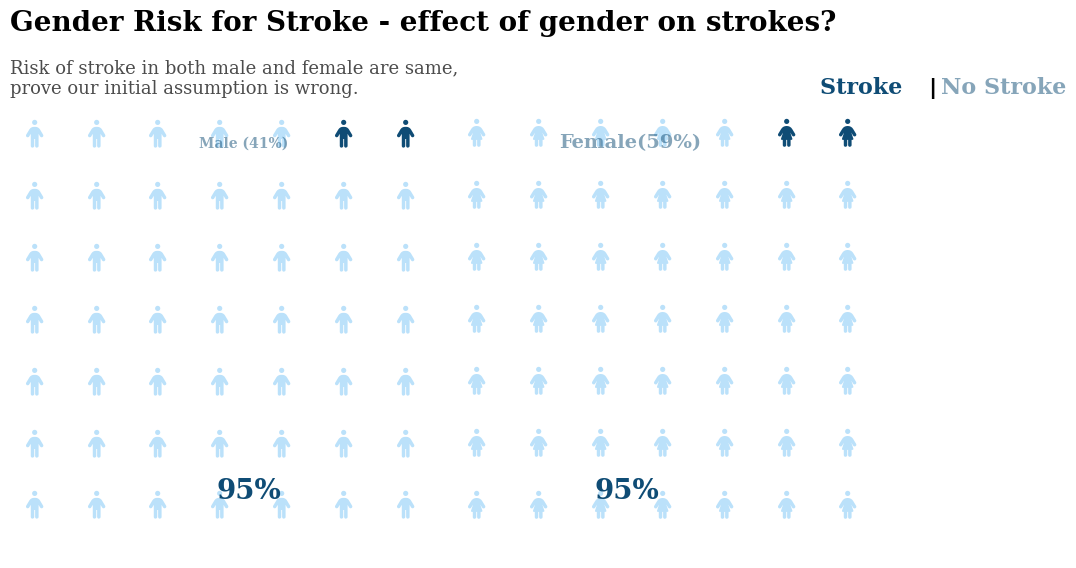

In [8]:
stroke_gen = df[df['stroke'] == 1]['gender'].value_counts()
healthy_gen = df[df['stroke'] == 0]['gender'].value_counts()

female = data['gender'].value_counts().values[0]
male =  data['gender'].value_counts().values[1]

stroke_female = int(round (stroke_gen.values[0] / female * 100, 0))
stroke_male = int(round( stroke_gen.values[1] / male *100, 0))
healthy_female = int(round(healthy_gen.values[0] / female * 100, 0))
healthy_male = int(round(healthy_gen.values[1] / male *100, 0))

female_per = int(round(female/(female+male) * 100, 0))
male_per = int(round(male/(female+male)* 100, 0))



fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (9,9),
                 facecolor = 'white',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [healthy_male,stroke_male],
                            'colors' : ['#BBE1FA','#0F4C75'],
                              'vertical' : True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'male',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[healthy_female,stroke_female],         
                              'colors' : ['#BBE1FA','#0F4C75'],
                              'vertical': True,
                              'interval_ratio_y': 0.1,
                              'interval_ratio_x': 0.1,
                              'icons' : 'female',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.1
                                                      
                           }
                         },
                   
)
#fig.text ('asdataasdataasd0', {'font':'Serif', 'size':35, 'color':'black'} )


fig.text(0., 0.8, 'Gender Risk for Stroke - effect of gender on strokes?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.73, 'Risk of stroke in both male and female are same,\nprove our initial assumption is wrong. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'}, alpha = 0.7)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'#ffffff'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'#ffffff'})
fig.text(0.23, 0.28, '{}%'.format(healthy_male), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
fig.text(0.65, 0.28, '{}%'.format(healthy_female), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
fig.text(0.21, 0.67, 'Male ({}%)'.format(male_per), {'font':'Serif', 'size':10,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
fig.text(0.61, 0.67, 'Female({}%)'.format(female_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.5)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.9,0.73, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#0F4C75'})
fig.text(1.02,0.73, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.035,0.73, 'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#0F4C75'},alpha = 0.5)


fig.show()

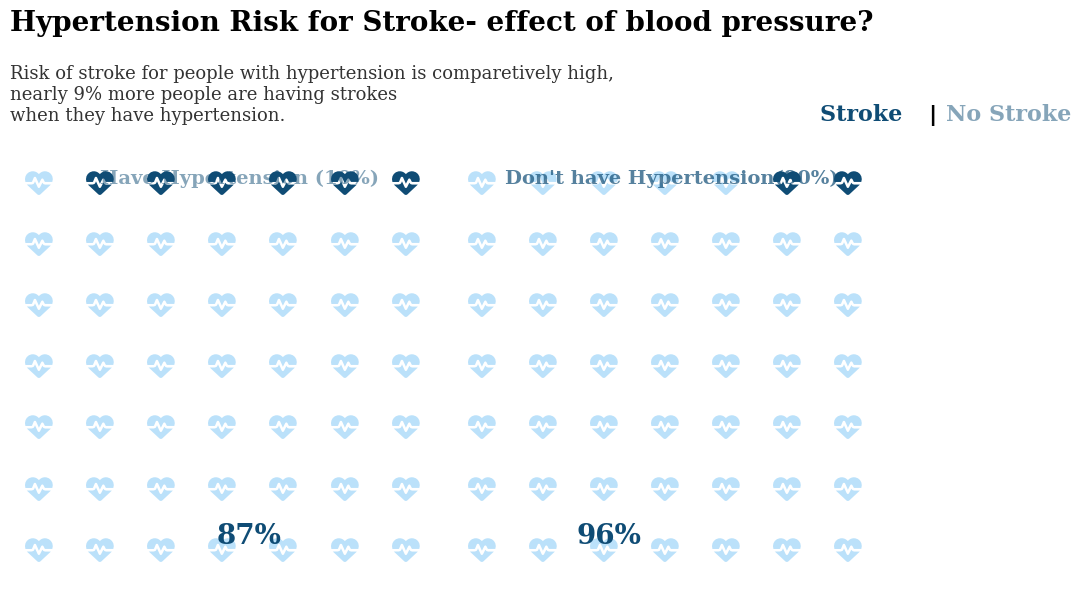

In [9]:
stroke_hyper = df[df['stroke'] == 1]['hypertension'].value_counts()
healthy_hyper = df[df['stroke'] == 0]['hypertension'].value_counts()

no = df['hypertension'].value_counts().values[0]
yes =  df['hypertension'].value_counts().values[1]

stroke_no = int(round (stroke_hyper.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_hyper.values[1] / yes *100, 0))
healthy_no = int(round(healthy_hyper.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_hyper.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (9,9),
                 facecolor = '#ffffff',dpi = 100,
                 
                 plots = {121:
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#0F4C75','#BBE1FA'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heartbeat',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':1,
                              'starting_location': 'NE'
                          },
                          
                          122 :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#0F4C75','#BBE1FA'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heartbeat',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':1,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
)


fig.text(0., 0.85, 'Hypertension Risk for Stroke- effect of blood pressure?', {'font':'Serif', 'size':20, 'color':'black', 'weight':'bold'})
fig.text(0., 0.75, 'Risk of stroke for people with hypertension is comparetively high,\nnearly 9% more people are having strokes \nwhen they have hypertension. ', {'font':'Serif', 'size':13, 'color':'black', 'weight':'normal'},alpha = 0.8)
fig.text(0.24, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold' ,'color':'white'})
fig.text(0.65, 0.22, 'ooo', {'font':'Serif', 'size':16,'weight':'bold', 'color':'white'})
fig.text(0.23, 0.28, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#0F4C75'},alpha = 1,)
fig.text(0.63, 0.28, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#0F4C75'}, alpha = 1)
fig.text(0.1, 0.68, 'Have Hypertension ({}%)'.format(yes_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'#0F4C75'},alpha = 0.5,)
fig.text(0.55, 0.68, "Don't have Hypertension({}%)".format(no_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'#0F4C75'}, alpha = 0.7)
#fig.text(0., 0.8, 'Assumption was proven wrong', {'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'})

fig.text(0.90,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#0F4C75'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
fig.text(1.04,0.75, 'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#0F4C75'},alpha = 0.5)


fig.show()

In [10]:
counts0 = Counter(df[df['stroke']==0]['ever_married'])
counts1 = Counter(df[df['stroke']==1]['ever_married'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#19D3F3', '#FF6692']))
fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Marital Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Ever Married?",
    font=dict(size=18)
)

fig.show()

In [11]:
counts0 = Counter(df[df['stroke']==0]['work_type'])
counts1 = Counter(df[df['stroke']==1]['work_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)
fig.update_traces(marker=dict(colors=['#F6CF70','#F59F70','#66C4CC','#FF97FF','19D3F3']))

fig.add_trace(go.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Worktype','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Worktype",
    font=dict(size=18)
)


fig.show()

In [12]:
counts0 = Counter(df[df['Residence_type']=='Rural']['stroke'])
counts1 = Counter(df[df['Residence_type']=='Urban']['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(
     values=[v for k,v in counts0.items()],
     labels=['Stroke Positive','Stroke Negative'],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Rural'), 
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[v for k,v in counts1.items()],
     labels=['Stroke Positive','Stroke Negative'],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Urban'),
    row=1, col=2)
fig.update_traces(marker=dict(colors=['#F6CF70','#66C4CC']))

fig.update_layout(
    title={'text':'Residence Type vs Stroke','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Stroke Status",
    font=dict(size=18)
)

fig.show()

In [13]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace=True)

In [14]:
glucose_bins = np.linspace(0,280,29)
bmi_bins = np.linspace(0,100,51)
age_bins = np.linspace(0,90,10)
df['binned_glucose'] = pd.cut(df['avg_glucose_level'], glucose_bins, labels=glucose_bins[:-1],right=False)
df['binned_bmi'] = pd.cut(df['bmi'], bmi_bins, labels=bmi_bins[:-1],right=False)
df['binned_age'] = pd.cut(df['age'], age_bins, labels=age_bins[:-1],right=False)
df['binned_glucose'] = df['binned_glucose'].astype('int')
df['binned_bmi'] = df['binned_bmi'].astype('int')
df['binned_age'] = df['binned_age'].astype('int')

Text(0, 0.5, 'Count')

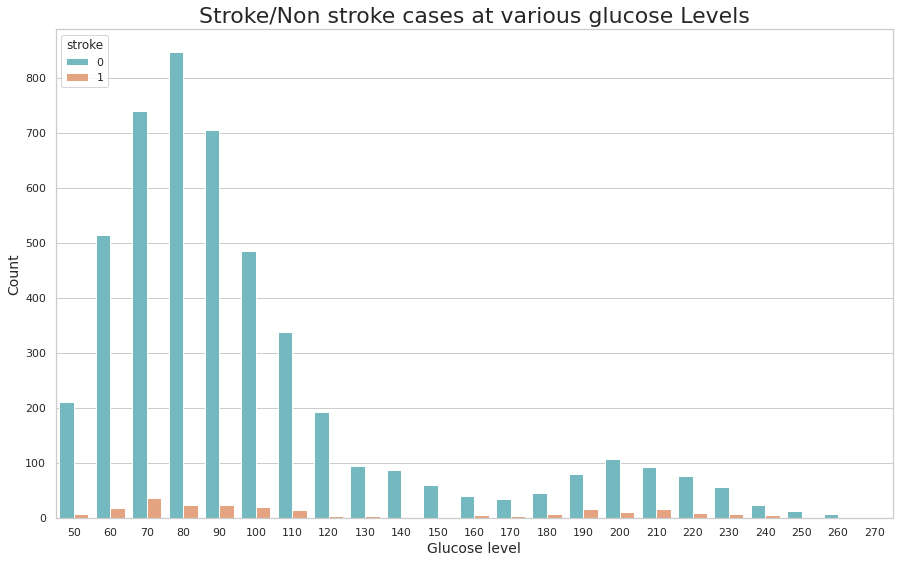

In [15]:
sns.set(rc={'figure.figsize':(15,9)})
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='binned_glucose',hue='stroke',palette=['#66C4CC',"#F59F70"],data=df)
ax.set_title('Stroke/Non stroke cases at various glucose Levels').set_fontsize(22)
ax.set_xlabel('Glucose level',fontsize=14)
ax.set_ylabel('Count',fontsize=14)


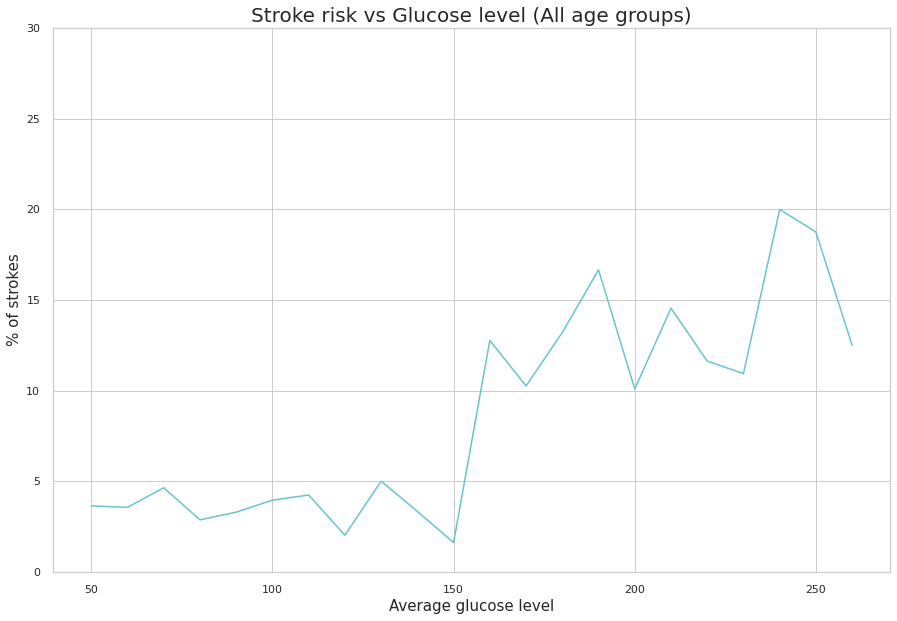

In [16]:
stroke_cases = Counter(df['binned_glucose'][df['stroke']==1])
total_cases = Counter(df['binned_glucose'])
stroke_pct = 100*np.array([item[1] for item in sorted(stroke_cases.items())])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.ylim(0,30)
plt.title('Stroke risk vs Glucose level (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('Average glucose level',fontsize=15)
plt.plot(labels[:-1],stroke_pct[:-1],'#66C4CC')

Text(0.5, 18.0, 'Average glucose level')

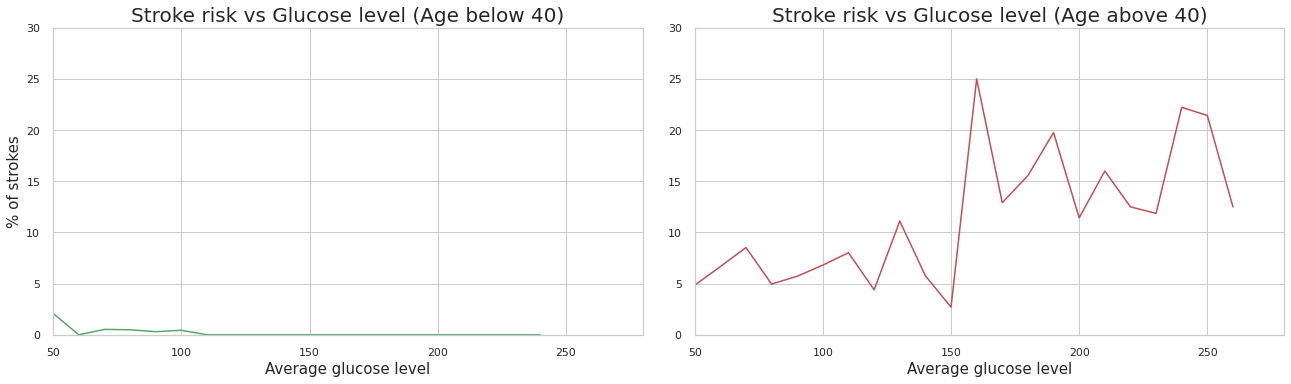

In [17]:
fix, ax = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
stroke_cases = Counter(df['binned_glucose'][(df['binned_age']<40) & (df['stroke']==1)])
total_cases = Counter(df['binned_glucose'][df['binned_age']<40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[0].set_ylim(0,30)
ax[0].set_xlim(50,280)
ax[0].plot(labels[:-1],stroke_pct[:-1],'g')
ax[0].set_title('Stroke risk vs Glucose level (Age below 40)',fontsize=20)
ax[0].set_ylabel('% of strokes',fontsize=15)
ax[0].set_xlabel('Average glucose level',fontsize=15)

stroke_cases = Counter(df['binned_glucose'][(df['binned_age']>=40) & (df['stroke']==1)])
total_cases = Counter(df['binned_glucose'][df['binned_age']>=40])
z=sorted(stroke_cases.items())
[z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
ax[1].set_ylim(0,30)
ax[1].set_xlim(50,280)
ax[1].plot(labels[:-1],stroke_pct[:-1],'r')
sns.set_theme(style="whitegrid")

ax[1].set_title('Stroke risk vs Glucose level (Age above 40)',fontsize=20)
#ax[1].set_ylabel('% of strokes',fontsize=15)
ax[1].set_xlabel('Average glucose level',fontsize=15)

In [18]:
# stroke_cases = Counter(df['binned_bmi'][df['stroke']==1])
# total_cases = Counter(df['binned_bmi'])
# z=sorted(stroke_cases.items())
# [z.append((item[0],0)) for item in sorted(total_cases.items()) if item[0] not in [item2[0] for item2 in sorted(stroke_cases.items())]]
# stroke_pct = 100*np.array([item[1] for item in sorted(z)])/np.array([item[1] for item in sorted(total_cases.items())])
# labels = [item[0] for item in sorted(total_cases.items())]
# plt.style.use('ggplot')
# plt.figure(figsize=(12,6))
# sns.set_theme(style="whitegrid")
# plt.ylim(0,30)
# plt.title('Stroke risk vs BMI (All age groups)',fontsize=20)
# plt.ylabel('% of strokes',fontsize=15)
# plt.xlabel('BMI',fontsize=15)
# plt.plot(labels,stroke_pct,'r')

In [19]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

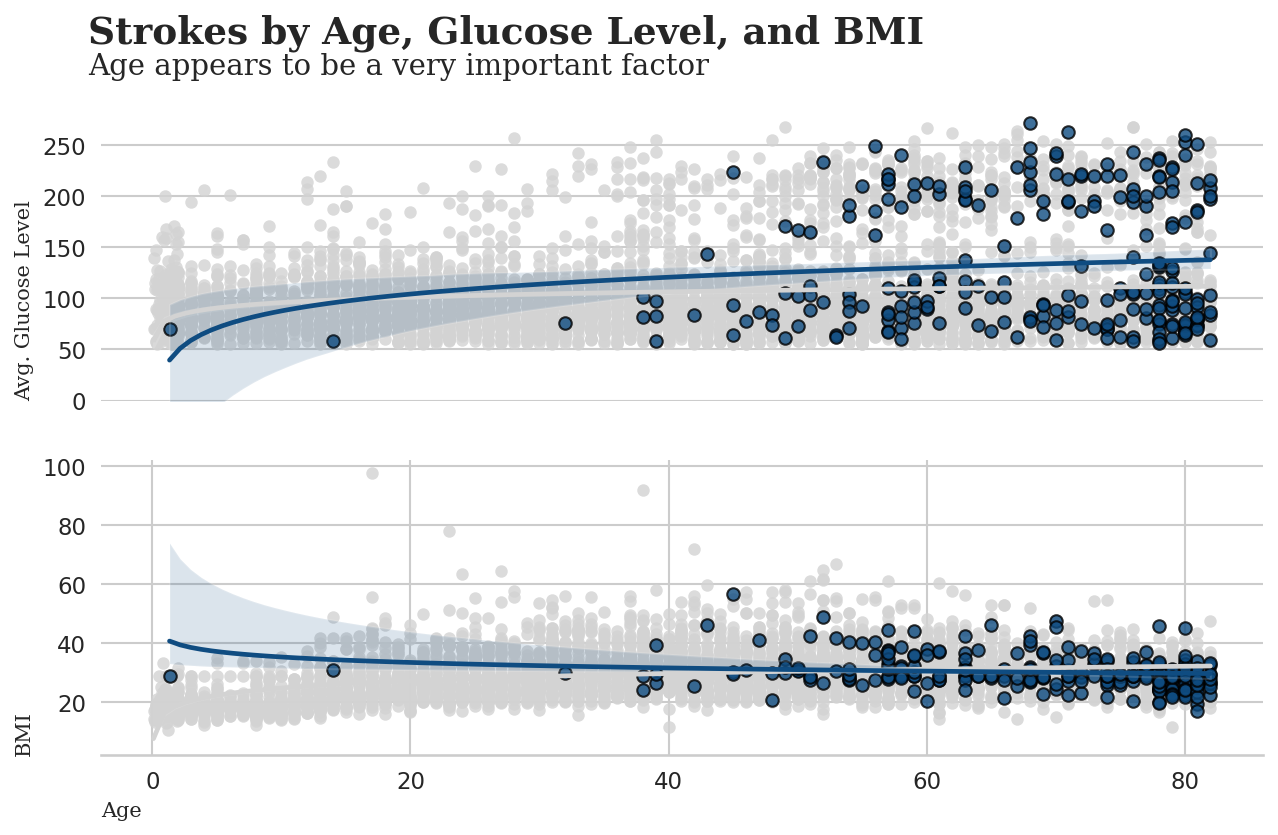

In [20]:
# Setting up figure and axes

fig = plt.figure(figsize=(10,12),dpi=150,facecolor='white') 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor("white")
ax1.set_facecolor('white')

# glucose

sns.regplot(no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['age'],y=str_only['avg_glucose_level'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif',loc='bottom')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)
# bmi
sns.regplot(no_str_only['age'],y=no_str_only['bmi'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['age'],y=str_only['bmi'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif',loc='left')
ax1.set_ylabel("BMI",fontsize=10,fontfamily='serif',loc='bottom')


for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)



plt.show()

Text(0.5, 1.0, 'Age, Glucose vs Stroke')

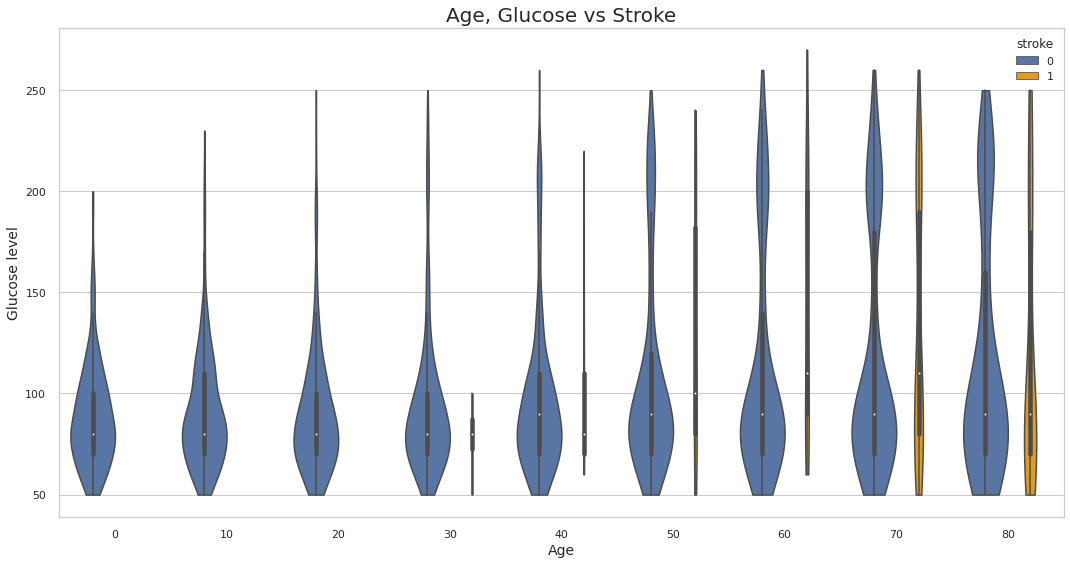

In [21]:
plt.figure(figsize=(18,9))
ax = sns.violinplot(x='binned_age',y='binned_glucose',hue='stroke',data=df,scale='count',palette={0: "b", 1: "orange"},cut=0)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Glucose level',fontsize=14)
ax.set_title('Age, Glucose vs Stroke',fontsize=20)

In [22]:
df['smokes'] = np.nan
df['smokes'][df['smoking_status']=='smokes'] = 1
df['smokes'][df['smoking_status']!='smokes'] = 0
df['smokes'] = df['smokes'].astype('int')

In [23]:
df['high_bmi']=np.nan
df['high_bmi'][df['bmi']>=25] = 1
df['high_bmi'][df['bmi']<25] = 0
df['no_of_risk_factors'] = df['hypertension']+df['heart_disease']+df['smokes']+df['high_bmi']

Text(0, 0.5, 'No. of risk factors')

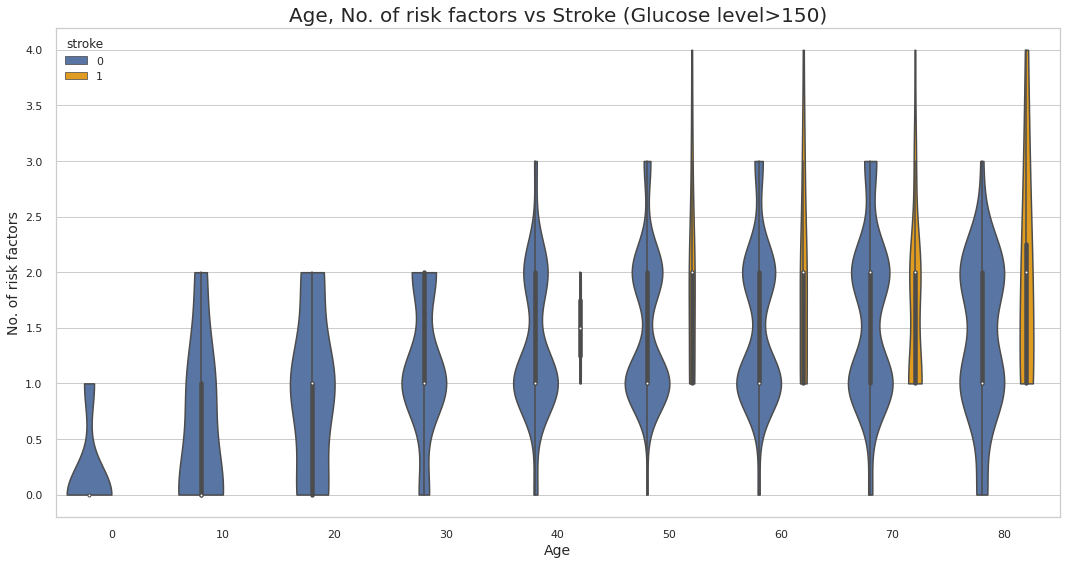

In [24]:
plt.figure(figsize=(18,9))
ax = sns.violinplot(x='binned_age',y='no_of_risk_factors',hue='stroke',data=df[df['binned_glucose']>150],scale='count',palette={0: "b", 1: "orange"},cut=0)
ax.set_title('Age, No. of risk factors vs Stroke (Glucose level>150)',fontsize=20)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('No. of risk factors',fontsize=14)

In [25]:
x = data.describe()
x.style.background_gradient(cmap = "YlGn")

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
#correlation
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [27]:
#the number of the missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
df2=data.copy()

In [29]:
#information about the data in the bmi column
df2["bmi"]

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

<Figure size 1080x720 with 0 Axes>

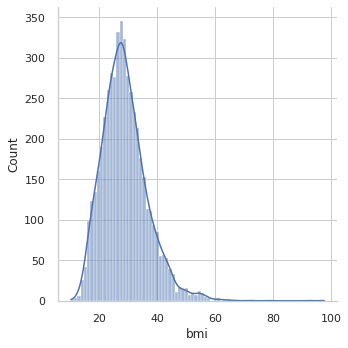

In [30]:
#The distribution of the data of the column
plt.figure(figsize=(15,10))
sns.displot(data = df2, x = "bmi", kde = True)

In [31]:
#filling the missings randomly
fill_list = data["bmi"].dropna()
df2 = data["bmi"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df2

0       36.6
1       23.1
2       32.5
3       34.4
4       24.0
        ... 
5105    24.2
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [32]:
df2.isnull().sum()

0

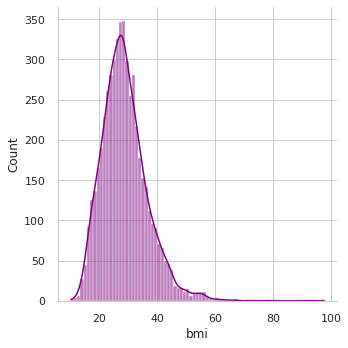

In [33]:
#checking the distribution after filling the missing values randomly
sns.displot(df2, kde = True, color = "Purple")

In [34]:
#filling with the mean
df3 = data["bmi"].fillna(data["bmi"].mean())
df3

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

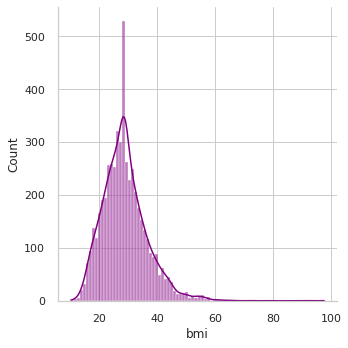

In [35]:
#checking the distribution after filling the missing values with the mean
sns.displot(df3, kde = True, color = "Purple")

In [36]:
#filling the missing randomly
data["bmi"] = df2
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,23.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [37]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [38]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [39]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],np.nan)


In [40]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

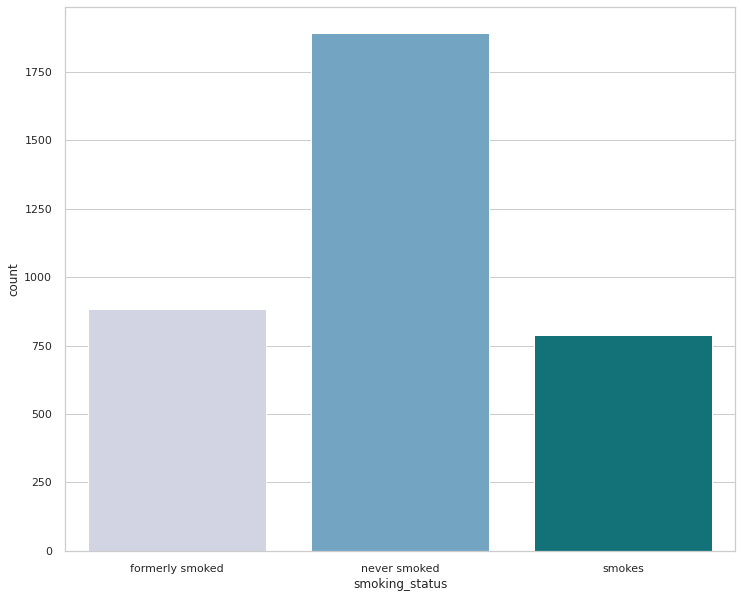

In [41]:
#The distribution of the data of the column
plt.figure(figsize=(12,10))
sns.countplot(data = data, x = "smoking_status",palette='PuBuGn')

In [42]:
#filling the missings randomly
fill_list = data["smoking_status"].dropna()
df4 = data["smoking_status"].fillna(pd.Series(np.random.choice(fill_list, size = len(data.index))))
df4.head

<bound method NDFrame.head of 0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109             smokes
Name: smoking_status, Length: 5110, dtype: object>

In [43]:
df4.isnull().sum()

0

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

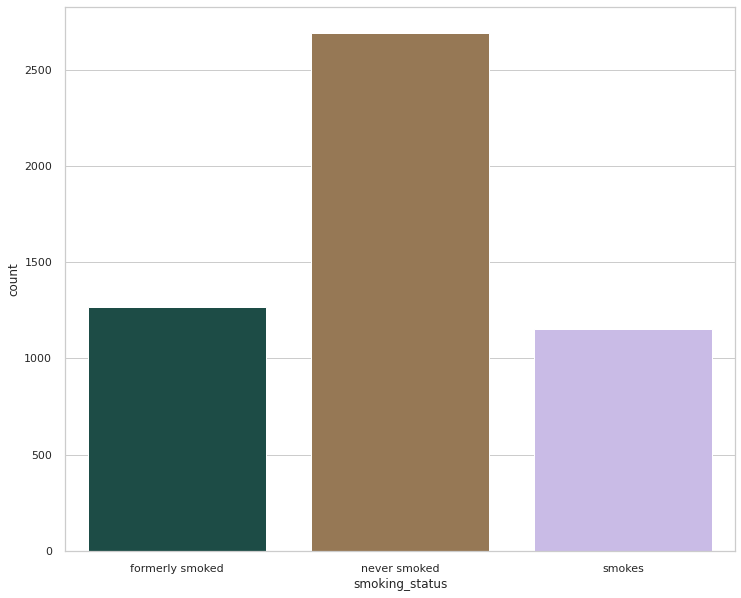

In [44]:
#checking the distribution after filling the missing values randomly
plt.figure(figsize=(12,10))
sns.countplot( x=df4,palette='cubehelix')

<AxesSubplot:xlabel='stroke', ylabel='age'>

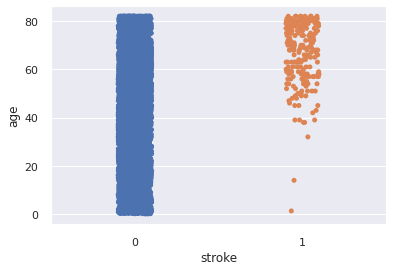

In [45]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.stripplot(y="age", x ="stroke", data = data)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

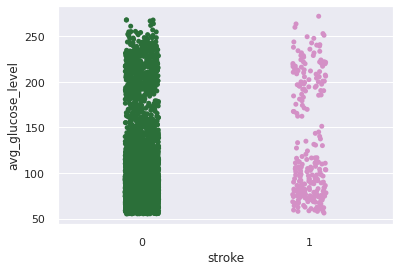

In [46]:
sns.stripplot(y="avg_glucose_level", x ="stroke", data = data, palette='cubehelix')

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

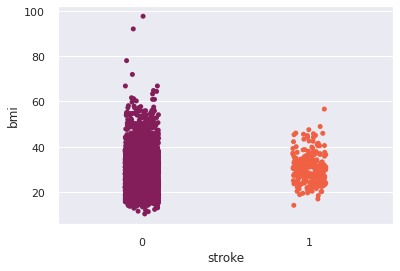

In [47]:
sns.stripplot(y="bmi", x ="stroke", data = data, palette='rocket')

In [48]:
#Handling the outliers in this column
data = data.loc[(data["bmi"]<70)]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,23.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

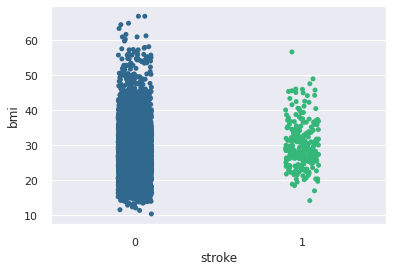

In [49]:
#re-checking for the outliers
sns.stripplot(y="bmi", x ="stroke", data = data, palette='viridis')

In [50]:
data = data.loc[(data["gender"] == "Male") | (data["gender"] == "Female") ]
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,23.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
gender_le = LabelEncoder()
data["gender"] = gender_le.fit_transform(data["gender"])


In [52]:
data.gender.value_counts()

0    2993
1    2112
Name: gender, dtype: int64

In [53]:
evermarried_le = LabelEncoder()
data["ever_married"] = evermarried_le.fit_transform(data["ever_married"])


In [54]:
data.ever_married.value_counts()

1    3351
0    1754
Name: ever_married, dtype: int64

In [55]:
worktype_le = LabelEncoder()
data["work_type"] = worktype_le.fit_transform(data["work_type"])


In [56]:
data.work_type.value_counts()

2    2920
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [57]:
residencetype_le = LabelEncoder()
data["Residence_type"] = residencetype_le.fit_transform(data["Residence_type"])


In [58]:
data.Residence_type.value_counts()

1    2595
0    2510
Name: Residence_type, dtype: int64

In [59]:
smoking_status_le = LabelEncoder()
data["smoking_status"] = smoking_status_le.fit_transform(data["smoking_status"])


In [60]:
data.smoking_status.value_counts()

1    1890
3    1543
0     884
2     788
Name: smoking_status, dtype: int64

In [61]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,23.1,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,1,1


<AxesSubplot:>

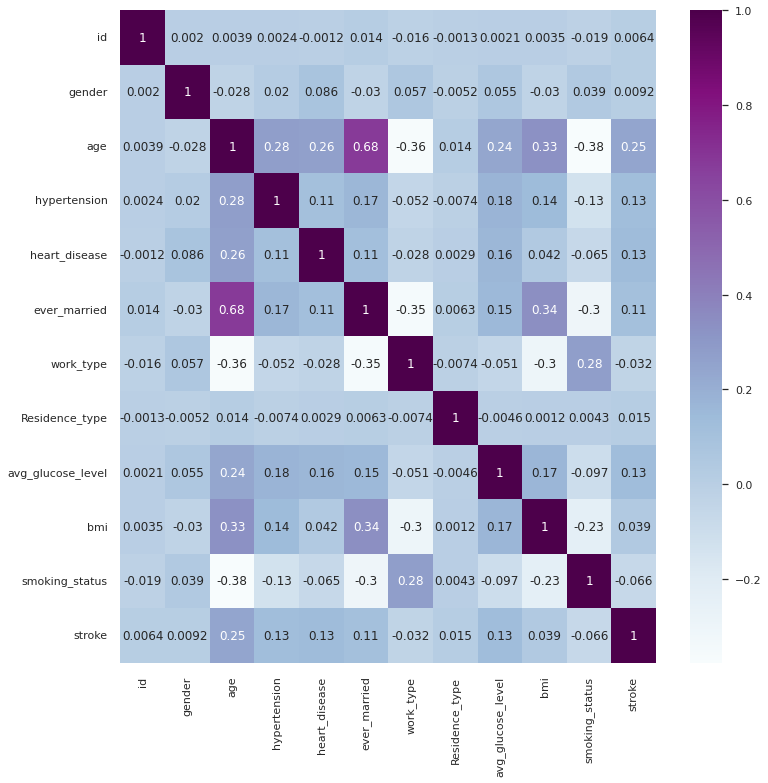

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

In [63]:
#Making a copy from the column that needs to be scaled
stroke_scale = data.iloc[:, :-1]
stroke_scale.reset_index()
norm_scaler = MinMaxScaler()
stroke_scale = norm_scaler.fit_transform(stroke_scale.to_numpy())
stroke_scale = pd.DataFrame (stroke_scale, columns = ["id", "gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"])
stroke_scale.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.123214,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.465487,0.000000
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.226549,0.333333
2,0.426015,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.392920,0.333333
3,0.824928,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.426549,0.666667
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.242478,0.333333


In [64]:
data.iloc[:, : -1] = stroke_scale
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.465487,0.000000,1
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.226549,0.333333,1
2,0.426015,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.392920,0.333333,1
3,0.824928,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.426549,0.666667,1
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.242478,0.333333,1


In [65]:
data.isnull().sum()

id                   5
gender               5
age                  5
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    5
bmi                  5
smoking_status       5
stroke               0
dtype: int64

In [66]:
#filling that missing value that appeared after scaling
data["age"].fillna(data["age"].mode()[0], inplace = True)
data["avg_glucose_level"].fillna(data["avg_glucose_level"].mode()[0], inplace = True)
data["bmi"].fillna(data["bmi"].mode()[0], inplace = True)


In [67]:
data.isnull().sum()

id                   5
gender               5
age                  0
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    0
bmi                  0
smoking_status       5
stroke               0
dtype: int64

In [68]:
#correlation
x = data.corr()
x.style.background_gradient(cmap = "rocket")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002175,0.003860,0.002302,-0.001307,0.014300,-0.015622,-0.001426,0.001941,0.003373,-0.018804,0.006383
gender,0.002175,1.000000,-0.027581,0.020714,0.086096,-0.030402,0.056573,-0.004131,0.054265,-0.029753,0.038977,0.009386
age,0.003860,-0.027581,1.000000,0.278665,0.263841,0.678950,-0.362375,0.013921,0.236638,0.329614,-0.375929,0.244665
hypertension,0.002302,0.020714,0.278665,1.000000,0.108937,0.165927,-0.051533,-0.007645,0.177237,0.143998,-0.130330,0.128573
heart_disease,-0.001307,0.086096,0.263841,0.108937,1.000000,0.114550,-0.027973,0.002806,0.162201,0.041788,-0.064801,0.134822
ever_married,0.014300,-0.030402,0.678950,0.165927,0.114550,1.000000,-0.353431,0.006283,0.154233,0.339327,-0.303892,0.108249
work_type,-0.015622,0.056573,-0.362375,-0.051533,-0.027973,-0.353431,1.000000,-0.007322,-0.050914,-0.300140,0.279540,-0.032270
Residence_type,-0.001426,-0.004131,0.013921,-0.007645,0.002806,0.006283,-0.007322,1.000000,-0.004191,0.001002,0.004387,0.015200
avg_glucose_level,0.001941,0.054265,0.236638,0.177237,0.162201,0.154233,-0.050914,-0.004191,1.000000,0.167101,-0.096964,0.132282
bmi,0.003373,-0.029753,0.329614,0.143998,0.041788,0.339327,-0.300140,0.001002,0.167101,1.000000,-0.234350,0.038786


In [69]:
data = data.loc[:, ["age", "hypertension", "heart_disease", "avg_glucose_level","bmi", "ever_married", "stroke"]]
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
0,0.816895,0.0,1.0,0.801265,0.465487,1.0,1
1,0.743652,0.0,0.0,0.679023,0.226549,1.0,1
2,0.975586,0.0,1.0,0.234512,0.392920,1.0,1
3,0.597168,0.0,0.0,0.536008,0.426549,1.0,1
4,0.963379,1.0,0.0,0.549349,0.242478,1.0,1


In [70]:
data["stroke"].value_counts()

0    4856
1     249
Name: stroke, dtype: int64

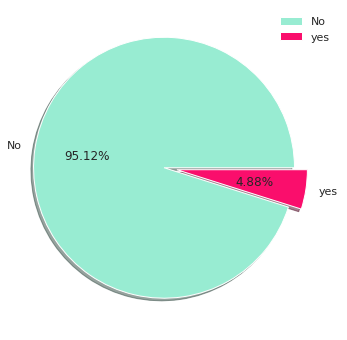

In [71]:
plt.figure(figsize= (8, 6))
data_pie  = [4856 , 249]
labels = ["No", "yes"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#98ecd2', '#fa0e6c'])
plt.legend()
plt.show()

In [72]:
class1 = data.loc[(data["stroke"]==1)]
class1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
0,0.816895,0.0,1.0,0.801265,0.465487,1.0,1
1,0.743652,0.0,0.0,0.679023,0.226549,1.0,1
2,0.975586,0.0,1.0,0.234512,0.392920,1.0,1
3,0.597168,0.0,0.0,0.536008,0.426549,1.0,1
4,0.963379,1.0,0.0,0.549349,0.242478,1.0,1


In [73]:
class0 = data.loc[(data["stroke"]==0)]
class0.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
249,0.035645,0.0,0.0,0.184655,0.136283,0.0,0
250,0.707031,1.0,0.0,0.151602,0.511504,1.0,0
251,0.096680,0.0,0.0,0.257455,0.129204,0.0,0
252,0.853516,0.0,0.0,0.064260,0.453097,1.0,0
253,0.169922,0.0,0.0,0.490075,0.155752,0.0,0


In [74]:
class1_over = class1.sample(data["stroke"].value_counts()[0], replace=True)
test_over = pd.concat([class1_over, class0], axis=0)
test_over.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
156,0.609375,0.0,0.0,0.217154,0.373451,1.0,1
69,0.975586,1.0,0.0,0.081017,0.329204,1.0,1
83,0.829102,1.0,0.0,0.113886,0.343363,0.0,1
241,0.694824,0.0,0.0,0.656264,0.428319,1.0,1
213,0.584961,0.0,0.0,0.087665,0.180531,1.0,1


In [75]:
test_over["stroke"].value_counts()

1    4856
0    4856
Name: stroke, dtype: int64

In [76]:
data = test_over.copy().reset_index()
data.head()

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married,stroke
0,156,0.609375,0.0,0.0,0.217154,0.373451,1.0,1
1,69,0.975586,1.0,0.0,0.081017,0.329204,1.0,1
2,83,0.829102,1.0,0.0,0.113886,0.343363,0.0,1
3,241,0.694824,0.0,0.0,0.656264,0.428319,1.0,1
4,213,0.584961,0.0,0.0,0.087665,0.180531,1.0,1


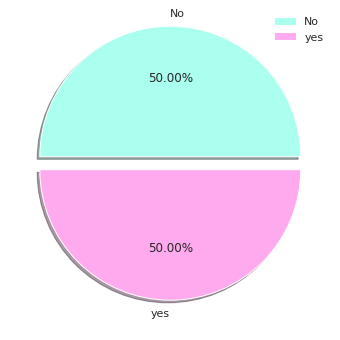

In [77]:
plt.figure(figsize= (8, 6))
data_pie  = [4856 , 4856]
labels = ["No", "yes"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#aaffee', '#ffaaee'])
plt.legend()
plt.show()

In [78]:
data=data.dropna()

In [79]:
X = data.drop(['stroke','index'], axis= 1).values 
y = data['stroke'].values

In [80]:
X.shape

(9707, 6)

In [81]:
y.shape

(9707,)

In [82]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =42,shuffle=True)

In [83]:
X_train.shape

(7765, 6)